# Case Study: NCPI

The NIH Cloud Platform Interoperability Effort (NCPI), is a joint effort to connect various NIH data systems, including data from AnVIL, BioData Catalyst, the Cancer Data Research Commons (CRDC), the Kids First Data Resource Center and the National Center for Biotechnology Information (NCBI). By convention, FHIR implementation guides include small example datasets that illustrate extensions and conformance to the specifications defined in the guide. Data for the NCPI is extracted from examples included in the ImplementationGuide. [https://nih-ncpi.github.io/ncpi-fhir-ig/artifacts.html]. A small study with a single Patient is provided. However, all other expected entities are present: Specimen, Task and DocumentReference. In this implementation study aggregation variables StorageSize, CohortCount, Participant, SampleCount, are contained in an Observation.extension. Additionally, this example illustrates how the utility handles a degree of polymorphism - the Observation.focus refers to either a Patient or a ResearchStudy.


In [1]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [2]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide

In [3]:
graph = load_graph('ncpi', manifests.ncpi_file_paths(), expected_resource_count=12)

### Draw a detailed graph

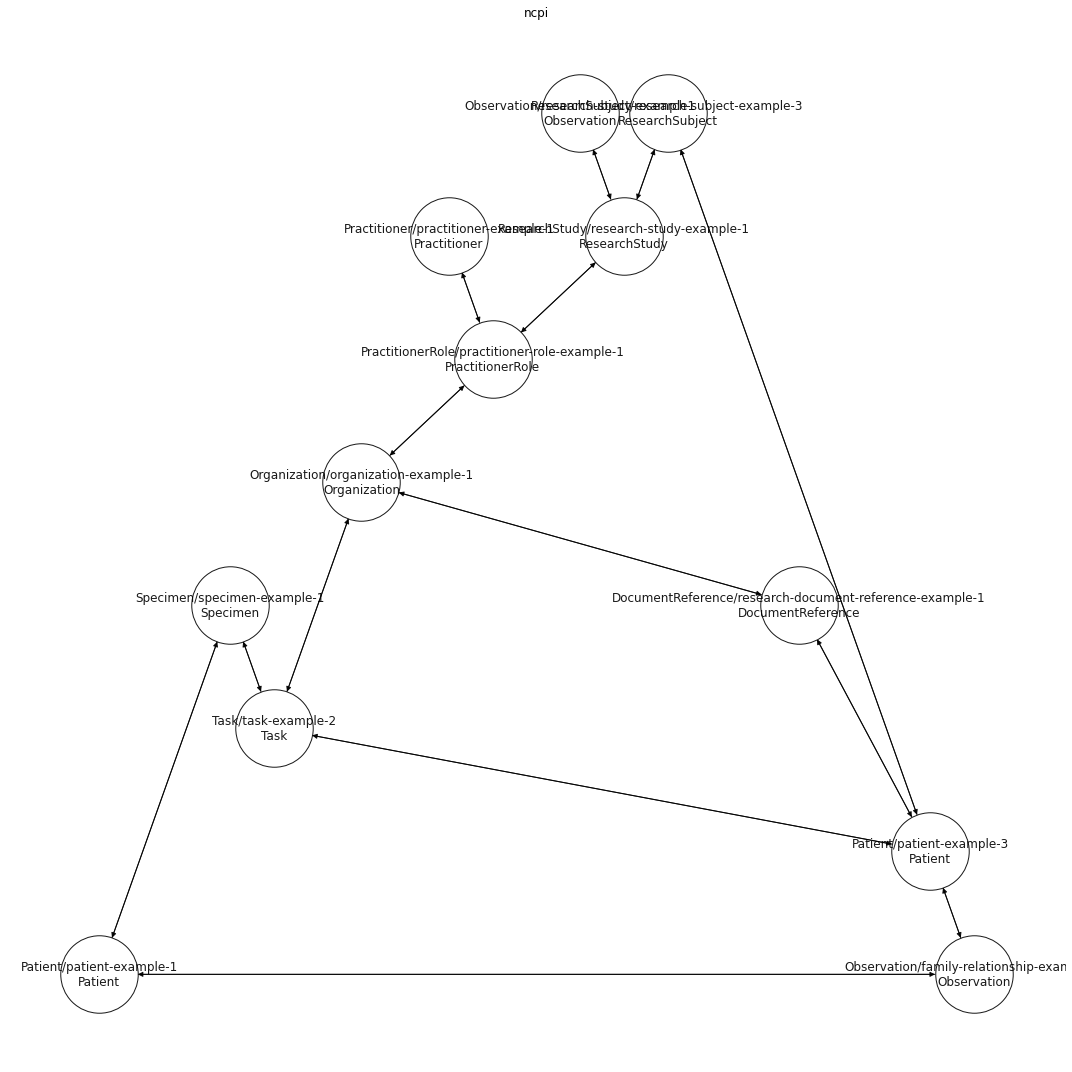

In [4]:
path = os.path.join('/tmp/', 'ncpi.png')
draw_graph(graph, path=path)

### Retrieve a Patient

In [5]:
# "retrieve" the patient
patient_example_3 = graph.nodes['Patient/patient-example-3']['resource']

### Show details

In [6]:
pd.DataFrame([flatten(patient_example_3.as_json())])

,id,text_status,text_div,extension_0_extension_0_url,extension_0_extension_0_valueCoding_system,extension_0_extension_0_valueCoding_code,extension_0_extension_0_valueCoding_display,extension_0_extension_1_url,extension_0_extension_1_valueCoding_system,extension_0_extension_1_valueCoding_code,...,contact_0_telecom_0_rank,contact_0_address_use,contact_0_address_type,contact_0_address_text,contact_0_address_line_0,contact_0_address_city,contact_0_address_state,contact_0_address_postalCode,contact_0_gender,resourceType
0,patient-example-3,extensions,"<div xmlns=""http://www.w3.org/1999/xhtml""><p><...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,detailed,urn:oid:2.16.840.1.113883.6.238,2113-9,...,1,home,both,"3401 Civic Center Blvd., Philadelphia, PA 19104",3401 Civic Center Blvd.,Philadelphia,PA,19104,female,Patient


### Show simplified details

> 1/3 the number of columns

In [7]:
simplified_js, simplified_schema = patient_example_3.as_simplified_json()
pd.DataFrame([flatten(simplified_js)]) 

,id,text_status,text_div,extension_us-core-race,extension_us-core-ethnicity,name_use,name_text,name_family,name_given_0,name_given_1,...,contact_telecom_use,contact_telecom_rank,contact_address_use,contact_address_type,contact_address_text,contact_address_line,contact_address_city,contact_address_state,contact_address_postalCode,contact_gender
0,patient-example-3,extensions,"<div xmlns=""http://www.w3.org/1999/xhtml""><p><...",2106-3|2113-9|White,2186-5|Not Hispanic or Latino,official,John Samuel Smith,Smith,Jone,Samuel,...,home,1,home,both,"3401 Civic Center Blvd., Philadelphia, PA 19104",3401 Civic Center Blvd.,Philadelphia,PA,19104,female


## Navigate using FHIR references

In [8]:
research_study_example_1 = graph.nodes['ResearchStudy/research-study-example-1']['resource']

In [9]:
f"The id of the PI is {research_study_example_1.principalInvestigator.resolved().id}"

'The id of the PI is practitioner-role-example-1'

## Navigate using graph paths

In [10]:
research_studies = find_nearest(graph, 'Patient/patient-example-1', 'ResearchStudy')
assert research_studies[0], f"Should traverse Patient to ResearchStudy {research_studies}"
research_study_example_1 = graph.nodes[research_studies[0]]['resource'] 
f"The id of the ResearchStudy is {research_study_example_1.id}"


'The id of the ResearchStudy is research-study-example-1'